In [27]:
# importation des libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn import metrics



# lecture des données et mise en forme

df = pd.read_csv('BTC-USD.csv', encoding='utf-8')
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)


df.sort_values('Date',ascending=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2840,2022-06-27,21028.238281,21478.089844,20620.199219,20735.478516,20735.478516,20965695707
2841,2022-06-28,20731.544922,21164.423828,20228.812500,20280.634766,20280.634766,21381535161
2842,2022-06-29,20281.169922,20364.156250,19937.791016,20104.023438,20104.023438,23552740328
2843,2022-06-30,20108.312500,20141.160156,18729.656250,19784.726563,19784.726563,26267239923


Source et collecte des données : https://fr.investing.com/crypto/bitcoin/historical-data

Prix journalier du BTC du 18/07/2010 au 01/07/2022 ,4367 elements

Nous souhaitons prédire le prix du btc, notre target sera donc le dernier prix connu journalier (prix a la fermeture de la séance), il s'agit donc d'une variable quantitative continue


In [33]:
# nettoyage données 

df['Date'] = df['Date'].values.astype('datetime64[D]')


#  definition des colonnes features et target 

date = df['Date']
open = df['Open']
close = df['Close']
High = df['High']
low = df['Low']
volume = df['Volume']


features = df[['Open','High','Low',]]
# features = date

target = close

df.head


<bound method NDFrame.head of            Date          Open          High           Low         Close  \
0    2014-09-17    465.864014    468.174011    452.421997    457.334015   
1    2014-09-18    456.859985    456.859985    413.104004    424.440002   
2    2014-09-19    424.102997    427.834991    384.532013    394.795990   
3    2014-09-20    394.673004    423.295990    389.882996    408.903992   
4    2014-09-21    408.084991    412.425995    393.181000    398.821014   
...         ...           ...           ...           ...           ...   
2840 2022-06-27  21028.238281  21478.089844  20620.199219  20735.478516   
2841 2022-06-28  20731.544922  21164.423828  20228.812500  20280.634766   
2842 2022-06-29  20281.169922  20364.156250  19937.791016  20104.023438   
2843 2022-06-30  20108.312500  20141.160156  18729.656250  19784.726563   
2844 2022-07-01  19820.470703  20632.671875  19073.708984  19269.367188   

         Adj Close       Volume  
0       457.334015     21056800  
1

Evolution du prix du BTC sur le temps

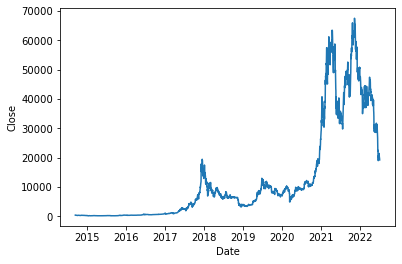

In [29]:
sns.lineplot(x=date,y=close)

Corrélation HeatMap

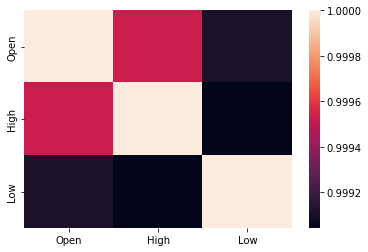

In [34]:
sns.heatmap(features.corr())

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features.values.reshape(-1,1),target,test_size=0.2)

# MLM

model = LinearRegression().fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.coef_, model.intercept_)
# model.predict()


# Stochastic Gradient descent

# reg = SGDRegressor(max_iter=100,eta0=0.0001)
# reg.fit(x_train,y_train)


# score du modele
# print(reg.score(x_test,y_test))
# print(reg.coef_, reg.intercept_)
# reg.predict(x_test)

plt.scatter(x_train, y_train, c='blue', label='Train set')
plt.scatter(x_test, y_test, c='red', label='Test set')
plt.legend()




ValueError: Found input variables with inconsistent numbers of samples: [11380, 2845]